<center><img src="img/skillfactorylogo.png"></center>

<h1><center>Курс "Практический Machine Learning"</center></h1>
<h3><center>Шестаков Андрей</center></h3>
<hr>
<h2><center>Логистическая регрессия</center></h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18,12)

from ipywidgets import interact, IntSlider, FloatSlider

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Svm_separating_hyperplanes_%28SVG%29.svg/512px-Svm_separating_hyperplanes_%28SVG%29.svg.png'></center>

Нам надо найти уравнение прямой (гиперплоскости), которая бы могла разделить два класса ($H_2$ и $H_3$ подходят). В данном случае, уравнение прямой задаётся как: $$g(x) = w_0 + w_1x_1 + w_2x_2 = \langle w, x \rangle =  w^\top x$$

* Если $g(x^*) > 0$, то $y^* = +1 = \text{'черный'}$
* Если $g(x^*) < 0$, то $y^* = -1 = \text{'белый'}$
* Если $g(x^*) = 0$, то мы находимся на линии
* т.е. решающее правило: $y^* = sign(g(x^*))$

In [ ]:
def demo_sigmoid():
    def sigmoid(z):
        return 1./(1. + np.exp(-z))

    z = np.linspace(-10, 10, 100)

    y = sigmoid(z)
    plt.plot(z, y)
    plt.xlabel('$z$')
    plt.ylabel('$\sigma(z)$')
    
    plt.show()

Перед тем как мы пойдем дальше, рассмотрим функцию $$\sigma(z) = \frac{1}{1 + exp{(-z)}},$$она называется **сигмойда**. 

In [ ]:
demo_sigmoid()

<center><img src='img/prob.png'></center>

#### Постановка задачи
Будем требовать, чтобы алгоритм возвращал вероятность класса $y=+1$:
$$h(x,w) = p(y=+1|x,w) = \sigma(g(x))$$

Выпишем функцию правдоподобия (используем метод максимального правдоподобия)
$$ \mathcal{L}(w) = \prod_i^n h(x^{(i)},w)^{[y^{(i)} = +1]} (1 - h(x^{(i)},w))^{[y^{(i)} = -1]} \rightarrow \max_w$$
$$ -\log{\mathcal{L}(w)} = - \sum_i^n [y^{(i)} = +1]\cdot\log{(h(x^{(i)},w))} + {[y^{(i)} = -1]}\cdot\log{(1-h(x^{(i)},w))} \rightarrow \min_w$$
$$L(w) = \log{\mathcal{L}(w)} \rightarrow \min_w $$

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


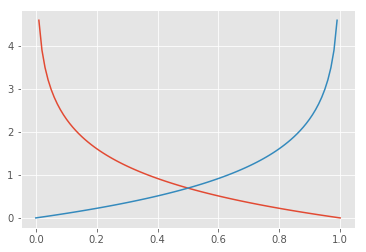

In [9]:
#Полагаме, что объект относится к классу +1
h = np.linspace(0, 1, 100)
L1 = -np.log(h)
L2 = -np.log(1-h)

plt.plot(h, L1)
plt.plot(h, L2)

In [10]:
#генерим случайный массив точек
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) + [2, 2],
          np.random.randn(20, 2) + [-2, -2]]
y = [-1] * 20 + [1] * 20

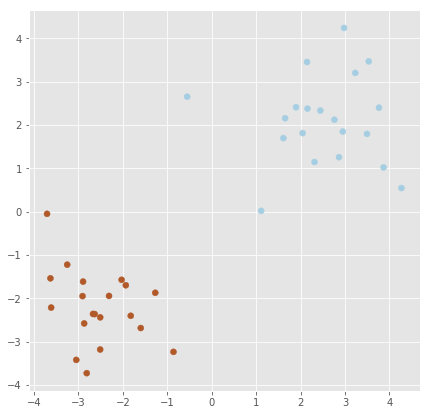

In [11]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.Paired)

In [12]:
from sklearn.linear_model import LogisticRegression

Обучите логистическую регрессию на этих данных и нарисуйте разделяющую гиперплоскость

In [13]:
model = LogisticRegression(C=1.0, 
                           fit_intercept=True, 
                           penalty='l2')
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
print ('w_0 = {}'.format(model.intercept_))
print ('w_1, w_2 = ', model.coef_)

w_0 = [-0.18395377]
w_1, w_2 =  [[-1.06097157 -1.00171289]]


In [17]:
# Нарисуем эту гиперплоскость
w_0 = model.intercept_[0]
w_1 = model.coef_[0][0]
w_2 = model.coef_[0][1]

x_1 = np.linspace(-4, 4, 10)
x_2 = - (w_0 + w_1*x_1)/w_2

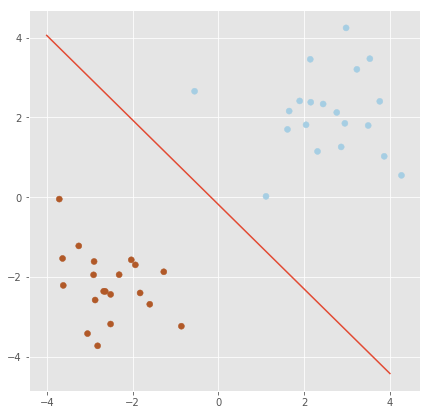

In [18]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.Paired)
plt.plot(x_1, x_2)

In [19]:
#результаты предсказаний
y_hat = model.predict(X)
y_hat[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [20]:
#вероятности отнесения к классам 1 и 2
y_hat_proba = model.predict_proba(X)
y_hat_proba[:10, :]

array([[9.98616528e-01, 1.38347180e-03],
       [9.99496019e-01, 5.03981209e-04],
       [9.95091160e-01, 4.90883960e-03],
       [9.94323473e-01, 5.67652674e-03],
       [9.90157090e-01, 9.84290974e-03],
       [9.97319087e-01, 2.68091305e-03],
       [9.94720579e-01, 5.27942062e-03],
       [9.94026880e-01, 5.97312006e-03],
       [9.96628393e-01, 3.37160720e-03],
       [9.77815343e-01, 2.21846572e-02]])

In [21]:
dec_func = model.decision_function(X)
dec_func[:10]

array([-6.58177471, -7.59246747, -5.31179677, -5.16572302, -4.61111223,
       -5.91891334, -5.23864551, -5.11449484, -5.68898843, -3.78591991])

### Как сделать нелинейную границу?

Рассмотрим набор данных, который в простонародье называют "Бублик".

In [22]:
from sklearn.datasets import make_circles

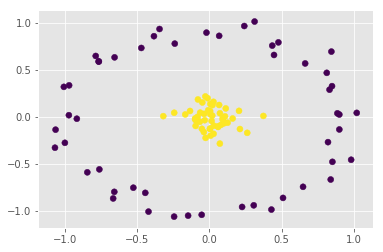

In [23]:
#генерим случайный массив
X, y = make_circles(n_samples=100, shuffle=True,
                    noise = 0.1,
                    factor=0.1)

plt.scatter(X[:, 0],
            X[:, 1],
            c=y)

Очевидно, что классы нельзя разделить линией. Но можно сделать это окружностью! </br>
Т.е. разделяющся линия теперь будет задаваться не уравнением прямой $g(x) = w_0 + w_1x_1 + w_2x_2$, а уравнением окружности $c(x) = (x_1 - a)^2 + (x_2 - b)^2 - R^2$. 

Выполните преобразование матрицы X, чтобы в ней были столбцы для $x_1$, $x^2_1$, $x_2$, $x^2_2$ и обучите логистическую регрессию

In [29]:
#дополняем признаком суммы квадратов (как уравнение окружности)
X_new = np.c_[X[:,0], X[:,1], X[:,0]**2,  X[:,1]**2]
model = LogisticRegression(C=100000, 
                           fit_intercept=True)
model.fit(X_new, y)

LogisticRegression(C=100000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [26]:
# Посчитаем количество ошибок
y_hat = model.predict(X_new)
(y != y_hat).sum()

0

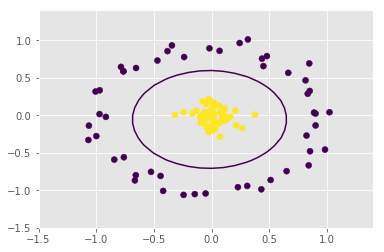

In [30]:
# Нарисуем полученную окружность

x0, x1 = np.meshgrid(np.arange(-1.5, 1.5, 0.1),
                       np.arange(-1.5, 1.5, 0.1))
xx0, xx1 = x0.ravel(), x1.ravel()

X_grid = np.c_[xx0, xx1, xx0**2, xx1**2]

y_hat = model.decision_function(X_grid)
y_hat = y_hat.reshape(x0.shape)

plt.contour(x0, x1, y_hat, levels=[0])
plt.scatter(X[:,0], 
            X[:, 1], 
            c=y)

## Анализ тональности

Загрузите текстовые данные [отсюда](https://archive.ics.uci.edu/ml/machine-learning-databases/00331/). Архив должен содержать 3 файла с положительными и отрицательными отзывами с ресурсов
* imdb.com
* amazon.com
* yelp.com

Формат файла следующий:
<отзыв>\t<метка>\n


### Задача
1. Загрузите тексты и метки классов в разные переменные
2. Выберите меру качества классификации
3. Обучите логистическую (без подбора гиперпараметров). Тексты представляются в виде мешка слов
4. Выведите наиболее значимые слова из текста

In [33]:
#загружаем файл с amazon
df = pd.read_csv('data/amazon_cells_labelled.txt', sep = '\t', header = None, names = ['text', 'label'])
df.head()

,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [71]:
#min_df - мин кол-во документов, в которых встречается слово 
#max_df - доля документов, в которых встречаются слова (если слова больше, чем в 95% документов, не использовать их)
#ngram_range - атрибут, показывающий количество слов в сочетаниях, которые необходимо рассматривать: можно смотреть сочетания слов

model = Pipeline ([
    ('vect', CountVectorizer(stop_words='english', min_df=4, max_df=0.95, ngram_range = (2,2))),
    ('clf', LogisticRegression())
])

In [72]:
texts = df.text.values
y = df.label.values

In [44]:
texts[:10]

array(['So there is no way for me to plug it in here in the US unless I go by a converter.',
       'Good case, Excellent value.', 'Great for the jawbone.',
       'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
       'The mic is great.',
       'I have to jiggle the plug to get it to line up right to get decent volume.',
       'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
       'If you are Razr owner...you must have this!',
       'Needless to say, I wasted my money.',
       'What a waste of money and time!.'], dtype=object)

In [45]:
y[:10]

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0])

In [73]:
model.fit(texts, y)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=4,
        ngram_range=(2, 2), preprocessor=None, stop_words='english',
       ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [74]:
weights = model.named_steps['clf'].coef_

In [75]:
word = model.named_steps['vect'].get_feature_names()

In [76]:
imp = pd.Series(index=word, data = weights[0])

In [77]:
imp.sort_values()

waste money         -1.423035
does work           -1.269398
don buy             -1.260155
did work            -1.211374
piece junk          -1.147058
doesn work          -1.147058
customer service    -1.115423
don waste           -0.646741
car charger          0.108127
battery life         0.180836
bluetooth headset    0.245148
phone ve             0.258453
cell phone           0.605485
product price        0.630794
sound quality        0.722912
excellent product    0.995590
great reception      1.045314
like charm           1.070927
good quality         1.090538
good product         1.208273
easy use             1.208273
great product        1.232729
works fine           1.325217
highly recommend     1.466263
great phone          1.530479
works great          2.013483
dtype: float64

In [55]:
len(word)

272

In [58]:
weights.shape
word[:10]

['10',
 'able',
 'absolutely',
 'actually',
 'ago',
 'amazon',
 'arrived',
 'audio',
 'away',
 'awesome']

In [50]:
weights

array([[ 7.52010221e-01,  1.26512319e-01,  7.43917108e-01,
         2.69475046e-01,  1.97489893e-01,  1.73002966e-01,
         8.48198365e-02, -3.18970211e-01, -8.86680903e-02,
         1.18554717e+00, -5.57239323e-01, -1.53604855e+00,
         9.22935512e-02, -4.92045495e-02, -1.23996302e-01,
         5.78312281e-01,  1.72333373e+00,  4.92654269e-01,
        -2.98686822e-01, -3.34518755e-01,  2.59931115e-01,
         4.40982675e-01,  3.68536365e-02, -1.07821144e+00,
        -5.40977792e-01, -6.45888723e-01, -1.10730593e+00,
        -1.37115402e-01, -8.06243209e-01,  2.67929355e-01,
         3.06399361e-01,  8.25408449e-01,  3.90717031e-01,
         1.13559187e+00,  6.70908830e-01, -5.63436590e-01,
        -1.05522985e-01,  1.98714023e-01,  8.19778642e-01,
        -3.14814450e-01, -5.40504156e-01,  6.69076129e-01,
         8.73618537e-01, -6.29613572e-01,  1.10186450e-01,
        -1.59137395e-01,  1.14092792e+00,  6.77865860e-01,
        -7.41923892e-01, -4.98962357e-01, -4.78431750e-0

# Регуляризация

В случае с логистичесткой регресии, сложность модели выражается в значениях весов $w_j$ при признаках. Больший вес означает большее влияние признака на результат. В таком случае, давайте добавил штрафное слагаемое в функцию оптимизации для логистической регресии. Самый распространенные из них это:

Стало (Ridge Regularization)
$$ L(\beta_0,\beta_1,\dots) = \mathcal{L}(w) + \frac{1}{C}\sum_{j=1}^{m}w_j^2$$
или (Lasso Regularization)
$$ L(\beta_0,\beta_1,\dots) = \mathcal{L}(w)+ \frac{1}{C}\sum_{j=1}^{m}|w_j|$$

$C$ - называется гиперпараметром регуляризации и он задается вручную. Выбирается он с помощью кросс-валидации. Чем больше $С$ - тем меньше влияние регуляризации.

Lasso regression называется так, потому что она осуществляет "отлов" признаков - т.е. незначимые признаки будут иметь нулевые веса в модели, в то время как в Ridge regression - веса будут постепенно падать у всех признаков.

<img src='http://webdancer.is-programmer.com/user_files/webdancer/Image/lasso.png'>

Однако использование регуляризации превращает логистическую регрессию в черный ящик - мы предоставляем оптимизационному методу решать за нас, какие признаки важны для модели.

Давайте сравним работу регуляризаторов. 

1. Разбейте данные на обучающую и контрольную выборки.
1. Для $C$ из набора np.logspace(-3, 3, 10) обучите LogisctigRegression c Lasso регуляризацией (`penalty='l1'`). На каждой итерации оцените качество (ROC-AUC) на контрольной выборке и запомните полученные коэффициенты модели
1. На одном графике выведите значение качества в зависимости от параметра `C` 
1. На другом графике для каждого признака выведите изменение коэффициента в модели в зависимости от параметра `C`
1. Для оптимальной на ваш взгляд настройки модели выведите 5 наиболие "важных" признаков и их коэффициенты
1. Проделайте тоже самое для Ridge регуляризации (`penalty='l2'`)

In [78]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [79]:
df_churn = pd.read_csv('data/churn.csv')

In [81]:
def preproc(df_init):
    df_preproc = df_init.copy()
    
    # Удалили признаки
    df_preproc = df_preproc.drop(['State', 'Area Code', 'Phone'], axis=1)
    
    # Замена категориальных признаков
    df_preproc.loc[:,  ["Int'l Plan", 'VMail Plan']] = \
    df_preproc.loc[:,  ["Int'l Plan", 'VMail Plan']].replace({'no': 0, 'yes': 1})
    
    df_preproc.loc[:,  'Churn?'] = df_preproc.loc[:,  'Churn?'].replace({'False.': 0,
                                                                         'True.': 1})
    return df_preproc

In [82]:
df_preproc = df_churn.pipe(preproc)

In [83]:
X, y = df_preproc.iloc[:, :-1].values, df_preproc.iloc[:, -1].values

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [85]:
model = LogisticRegression(penalty='l1', C=1, fit_intercept=True)
#... После fit()

# # Коэффициенты w_1...w_d
# model.coef_

# # Коэффициент при свободном члене w_0
# model.intercept_

# # Предсказание
# model.predict(X_test)
# model.predict_proba(X_test)
# model.decision_function(X_test)


In [86]:
c_range

NameError: name 'c_range' is not defined

In [93]:
#penalty='l2' - регуляризация суммой квадратов
#penalty='l1' - регуляризация  модулями

coefs = np.empty((X.shape[1],))
scores = []

c_range = np.logspace(-3, 3, 10)

for C in c_range:
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(penalty='l2', fit_intercept=True, C=C))
    ])

    model.fit(X_train, y_train)
    
    
    coefs = np.c_[coefs, model.named_steps['clf'].coef_[0]]
    s = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    scores.append(s)
    

Text(0,0.5,'weights')

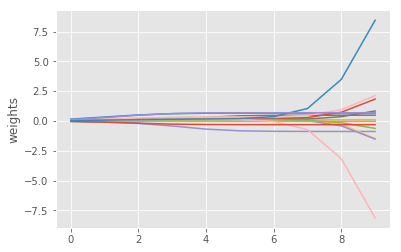

In [94]:
plt.plot(coefs[:, 1:].T)
plt.ylabel('weights')

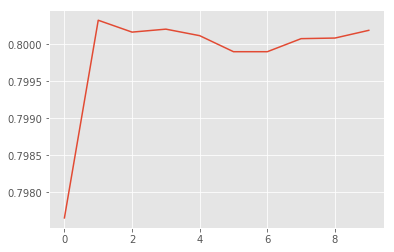

In [95]:
plt.plot(scores)